<div align="right" dir="auto">
   
#  دیتاست اول(COVID)
 </div>
  


<div align="right" dir="auto">
   
##  اتصال به کلاستر اسپارک و هدوپ 

    در این قسمت از تمرین باید به عنوان درایور یک سسشن  به کلاستر اسپارک بسازیم.
 </div>
  
* **appName**: application name displayed at the Spark Master Web UI;
* **master**: Spark Master URL, same used by Spark Workers;
* **spark.executor.memory**: must be less than or equals to docker compose SPARK_WORKER_MEMORY config.

In [2]:
pip install matplotlib

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.2/157.2 kB 343.8 kB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.2/9.2 MB 2.5 MB/s eta 0:00:0000:0100:010m
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 301.1/301.1 kB 1.2 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 3.0 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 2.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 3.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 103.1/103.1 kB 2.5 MB/s eta 0:00:0000:01
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pyspark
from pyspark.sql import SparkSession, functions

import os
import pandas
from pyspark.sql.types import *
import matplotlib.pyplot as plt

In [46]:
spark = SparkSession.builder.appName('spark-notebook-1').master('spark://spark-master:7077').config('spark.executor.memmory', '2G').getOrCreate()
spark


<div align="right" dir="auto">
   
#  خواندن داده 

    :در اسپارک ما ساختارهای مختلفی برای کار با داده و پخش شدن آن‌ها در شبکه داریم که به ۳ دسته تقسیم بندی میشوند 
+ RDD
+ Dataset
+ DataFrame
    
    
     برای مطالعه بیشتر به لینک زیر مراجعه کنید:
[rdd-vs-dataframe-vs-dataset](https://phoenixnap.com/kb/rdd-vs-dataframe-vs-dataset)

    ما در درس با ساختار RDD آشنا شدیم حال در این تمرین میخواهیم با ساختار Dataframe آشنا شویم و به کمک آن دیتا را از روی HDFS بخوانیم و روی آن فایل‌ها پردازش انجام دهیم
 
 </div>
  
    

In [47]:
# The data from covid.csv will be loaded from a local file path
for path, subdirs, files in os.walk('./data/'):
    for name in files:
        if "covid" in name:
            csvName = name
            csvPath = os.path.join(path, name)
            print("Loading data from csv {}".format(csvPath))
            covidDfPandas = pandas.read_csv(csvPath)

Loading data from csv ./data/covid.csv
Loading data from csv ./data/.ipynb_checkpoints/covid-checkpoint.csv


In [48]:
# Structure of data in the DataFrame
schema = StructType([
    StructField("dateRep", StringType(), True),
    StructField("day", IntegerType(), True),
    StructField("month", IntegerType(), True),
    StructField("year", IntegerType(), True),
    StructField("cases", IntegerType(), True),
    StructField("deaths", IntegerType(), True),
    StructField("countriesAndTerritories", StringType(), True),
    StructField("geoId", StringType(), True),
    StructField("countryterritoryCode", StringType(), True),
    StructField("popData2019", FloatType(), True),
    StructField("continentExp", StringType(), True),
    StructField("Cumulative_number_for_14_days_of_COVID-19_cases_per_100000", DoubleType(), True),
])


<div align="right" dir="auto">
یک DataFrame از Pandas را به یک DataFrame از Spark تبدیل کنید و سپس طرح ساختاری و برخی از داده‌ها را نمایش دهید.
 </div>
  
    




In [49]:
# Convert Pandas DataFrame to Spark DataFrame with defined schema
covidDfSpark = spark.createDataFrame(covidDfPandas.values.tolist(), schema=schema)

# Show the DataFrame schema and some data
covidDfSpark.printSchema()

root
 |-- dateRep: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- popData2019: float (nullable = true)
 |-- continentExp: string (nullable = true)
 |-- Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: double (nullable = true)




<div align="right" dir="auto">
   
#  اسپارک SQL 

    مهمترین قابلیت اسپارک این است که می‌تواند با خواندن فایل‌ها به صورت توزیع شده روی آن‌ها پردازش انجام دهد و این پردازش را برنامه ‌نویس میتواند با استفاده از دستورات SQL اعمال کند
    در این بخش از شما انتظار می‌رود که به وسیله spark SQL  به اسپارک کوئری  بزنید . 
    
    
 </div>

[pyspark.sql.functions.col](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.functions.col.html)

[pyspark.sql.DataFrame.count](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.count.html)

[pyspark.sql.DataFrame.filter](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.filter.html)

[pyspark.sql.DataFrame.groupBy](https://spark.apache.org/docs/3.1.1/api/python/reference/api/pyspark.sql.DataFrame.groupBy.html)

<div align="right" dir="auto">
برای اینکه بتوانیم روی دیتای لود شده به وسیله تابع  spark.sql
    کوئری‌های SQL بزنیم
    باید دو دیتاست لود شده را به عنوان table
    به spark 
    معرفی کنیم
</div>

In [50]:
covidDfSpark.registerTempTable("covid")

<div align="right" dir="auto">
 ده رکورد آخر را نمایش دهید
</div>

In [51]:
# to-do
spark.createDataFrame(covidDfSpark.tail(10)).show()

2023-12-06 19:28:40,878 WARN scheduler.TaskSetManager: Stage 30 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+------------+------------+----------------------------------------------------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode| popData2019|continentExp|Cumulative_number_for_14_days_of_COVID-19_cases_per_100000|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+------------+------------+----------------------------------------------------------+
|31/12/2019| 31|   12|2019|    0|     0|             Luxembourg|   LU|                 LUX|    613894.0|      Europe|                                                       NaN|
|31/12/2019| 31|   12|2019|    0|     0|                 Norway|   NO|                 NOR|   5328212.0|      Europe|                                                       NaN|
|31/12/2019| 31|   12|2019|    0|     0|               Malaysia|   MY|                 MYS| 3.1949788E7|        Asi

<div align="right" dir="auto">
اسکیما یا ساختار دیتاست ها را نمایش دهید

</div>

In [52]:
# to-do
print("+--------+--------------------+")
print("| column | type               |")
print("+--------+--------------------+")
for field in schema.fields:
    print("|{:<8}| {:<18}|".format(field.name, str(field.dataType)))
print("+--------+--------------------+")

+--------------------+---------+-------+
|            col_name|data_type|comment|
+--------------------+---------+-------+
|             dateRep|   string|   null|
|                 day|      int|   null|
|               month|      int|   null|
|                year|      int|   null|
|               cases|      int|   null|
|              deaths|      int|   null|
|countriesAndTerri...|   string|   null|
|               geoId|   string|   null|
|countryterritoryCode|   string|   null|
|         popData2019|    float|   null|
|        continentExp|   string|   null|
|Cumulative_number...|   double|   null|
+--------------------+---------+-------+



In [100]:
covidDfSpark.printSchema()

root
 |-- dateRep: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- year: integer (nullable = true)
 |-- cases: integer (nullable = true)
 |-- deaths: integer (nullable = true)
 |-- countriesAndTerritories: string (nullable = true)
 |-- geoId: string (nullable = true)
 |-- countryterritoryCode: string (nullable = true)
 |-- popData2019: float (nullable = true)
 |-- continentExp: string (nullable = true)
 |-- Cumulative_number_for_14_days_of_COVID-19_cases_per_100000: double (nullable = true)



<div align="right" dir="auto">
داده‌های مربوط به ستون   countryterritoryCode ,deaths را پرینت کنید(۱۰تا) 

</div>

In [149]:
# to-do
covidDfSpark.select(covidDfSpark.deaths, covidDfSpark.countryterritoryCode).show(10)

+------+--------------------+
|deaths|countryterritoryCode|
+------+--------------------+
|     6|                 AFG|
|     9|                 AFG|
|    11|                 AFG|
|    10|                 AFG|
|    16|                 AFG|
|    13|                 AFG|
|     6|                 AFG|
|    26|                 AFG|
|    10|                 AFG|
|    18|                 AFG|
+------+--------------------+
only showing top 10 rows



2023-12-07 12:04:01,615 WARN scheduler.TaskSetManager: Stage 247 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


<div align="right" dir="auto">
تعداد کل موارد Covid برابر است با?
</div>

In [54]:
# to-do
print('Total covid cases equal = ', covidDfSpark.count())

2023-12-06 19:30:28,934 WARN scheduler.TaskSetManager: Stage 32 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


Number of all Covid is 61900


<div align="right" dir="auto">
مجموع موارد کروناویروس در اکتبر ۲۰۲۰ در بلژیک را به دست آورید.
</div>



In [55]:
# to-do
covidDfSpark.filter((covidDfSpark.countriesAndTerritories == 'Belgium') & (covidDfSpark.month == 10) & (covidDfSpark.year == 2020)).agg(functions.sum('cases').alias('TotalCases:')).show()

+----------+
|TotalCases|
+----------+
|    320023|
+----------+



2023-12-06 19:30:39,687 WARN scheduler.TaskSetManager: Stage 34 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.



<div align="right" dir="auto">
جمع تعداد موارد و مرگ‌ها در کشورهای آسیا به دست آورید.
 
 </div>


In [60]:
# to-do
asian_deaths = covidDfSpark.filter(covidDfSpark.continentExp == "Asia")
asian_deaths.groupBy("countriesAndTerritories").agg(functions.sum("deaths").alias("total Deaths"), functions.sum("cases").alias("total Cases")).orderBy(asian_deaths.countriesAndTerritories.asc()).show

2023-12-06 19:35:02,269 WARN scheduler.TaskSetManager: Stage 42 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+--------------------+----------+-----------+
|countryterritoryCode|TotalCases|TotalDeaths|
+--------------------+----------+-----------+
|                 PSE|    124657|       1079|
|                 HTI|      9565|        234|
|                 BRB|       292|          7|
|                 LVA|     25675|        349|
|                 POL|   1135676|      22864|
|                 JAM|     11710|        273|
|                 ZMB|     18274|        367|
|                 BRA|   6901952|     181402|
|                 ARM|    148682|       2503|
|                 MOZ|     16954|        142|
+--------------------+----------+-----------+
only showing top 10 rows




<div align="right" dir="auto">
میانگین تعداد موارد و مرگ‌ها در کشورهای آسیا به دست آورید.
 
 </div>


In [61]:
# to-do
asian_deaths = covidDfSpark.filter(covidDfSpark.continentExp == "Asia")
asian_deaths.groupBy("countriesAndTerritories").agg(functions.avg("deaths").alias("average Deaths"), functions.avg("cases").alias("average Cases")).orderBy(asian_deaths.countriesAndTerritories.asc()).show

Average number of cases and deaths in the countries of Asia:


2023-12-06 19:36:03,207 WARN scheduler.TaskSetManager: Stage 48 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+-----------------+----------------+-----------------+
|          country|Average of cases|Average of deaths|
+-----------------+----------------+-----------------+
|      Afghanistan|          144.92|              5.8|
|          Bahrain|          255.42|              1.0|
|       Bangladesh|         1783.76|            25.64|
|           Bhutan|            1.59|              0.0|
|Brunei_Darussalam|            0.54|             0.01|
|         Cambodia|            1.05|              0.0|
|            China|          262.92|            13.54|
|            India|         28321.2|           410.76|
|        Indonesia|         1801.22|            54.87|
|             Iran|         3166.48|           149.13|
+-----------------+----------------+-----------------+
only showing top 10 rows




<div align="right" dir="auto">
جمع مرگ‌های کووید در اروپا بر اساس تاریخ به دست آورید.
 
 </div>

In [62]:
# to-do
europe_deaths = covidDfSpark.filter(covidDfSpark.continentExp == 'Europe')
total_deaths_by_date = europe_deaths.groupBy("dateRep").agg(functions.sum("deaths").alias("total_deaths")).show()

Sum of deaths of Covid in Europe by date:


2023-12-06 19:36:48,949 WARN scheduler.TaskSetManager: Stage 50 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+----------+--------------------------------+
|   dateRep|Sum of deaths of Covid in Europe|
+----------+--------------------------------+
|25/11/2020|                            6391|
|02/12/2020|                            6195|
|09/12/2020|                            6074|
|28/11/2020|                            6001|
|21/11/2020|                            5909|
|18/11/2020|                            5829|
|05/12/2020|                            5783|
|03/12/2020|                            5728|
|26/11/2020|                            5719|
|04/12/2020|                            5716|
+----------+--------------------------------+
only showing top 10 rows




<div align="right" dir="auto">
   
#  اسپارک toPandas 

    یکی ار قابلیت‌های اسپارک این است که می‌توان dataframe های آن را به 
    dataframe های pandas تبدیل کند و از توابع آن از جمله
    توابع plot  آن برای رسم نمودار استفاده کرد.
    در این قسمت از شما انتظار می‌رود نمودار تعداد جنگ‌ها بر اساس هر گونه را رسم کنید.
    
 </div>
  
    

  
[pyspark.sql.DataFrame.toPandas](https://spark.apache.org/docs/latest/api/python/reference/pyspark.sql/api/pyspark.sql.DataFrame.toPandas.html)

[pyspark.pandas.DataFrame.plot](https://spark.apache.org/docs/3.2.1/api/python/reference/pyspark.pandas/api/pyspark.pandas.DataFrame.plot.html)



<div align="right" dir="auto">
جمع موارد و مرگ‌ها برای هر قاره را به دست آورید.
 
 </div>

2023-12-06 19:48:14,718 WARN scheduler.TaskSetManager: Stage 93 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+------------+-----+
|continentExp|count|
+------------+-----+
|      Europe|17372|
|      Africa|14981|
|     America|13742|
|        Asia|13241|
|     Oceania| 2500|
|       Other|   64|
+------------+-----+



2023-12-06 19:48:15,270 WARN scheduler.TaskSetManager: Stage 95 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


<Axes: xlabel='continentExp'>

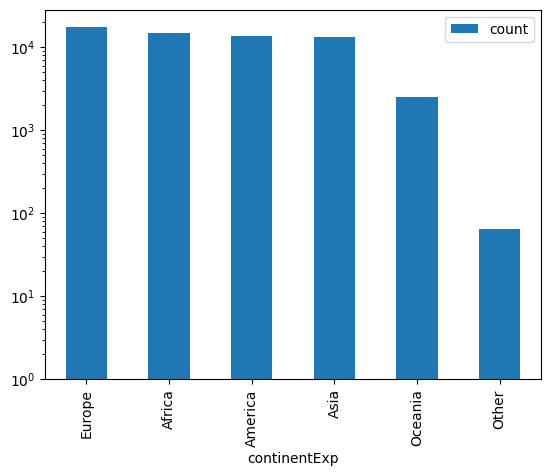

In [88]:
# to-do
total_cases_deaths_by_continent = covidDfSpark.groupby('continentExp')[['cases', 'deaths']].sum()
total_cases_deaths_by_continent.show()
total_cases_deaths_by_continent.toPandas().plot.bar(x="continentExp", y="count")

<div align="right" dir="auto">
نمودار مبتلایان در طور زمان را برای کشور ایران را بنویسید. 
    
 </div>
  

2023-12-07 07:44:49,209 WARN scheduler.TaskSetManager: Stage 242 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.
2023-12-07 07:44:49,329 WARN scheduler.TaskSetManager: Stage 243 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


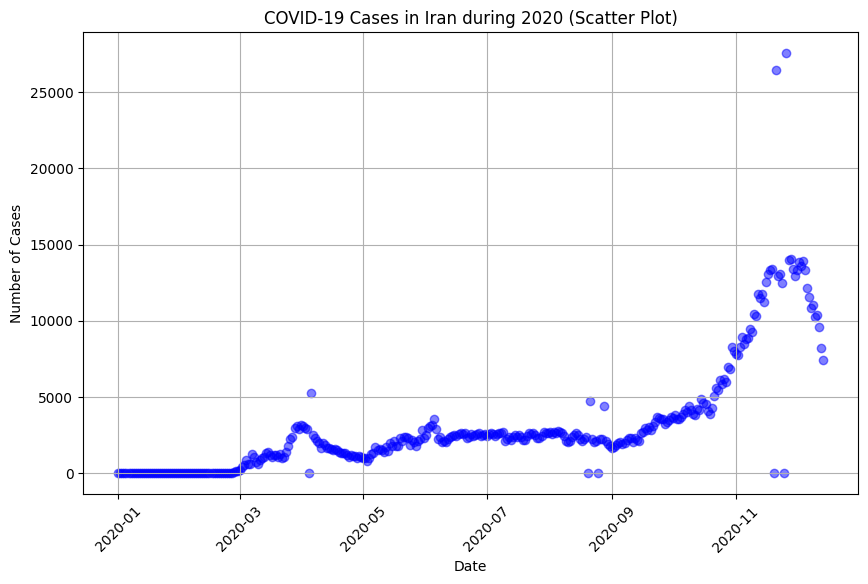

In [145]:
# to-do 
iran_data = covidDfSpark.filter(covidDfSpark['countriesAndTerritories'] == 'Iran')


iran_cases_2020 = iran_data.groupBy('dateRep').agg(
    functions.sum('cases').alias('total_cases')
).orderBy(functions.col('dateRep').desc())


iran_cases_pd = iran_cases_2020.toPandas()

iran_cases_pd.plot(kind='line', x='dateRep', y='total_cases')
plt.title('COVID-19 Cases Over Time in Iran')
plt.xlabel('Date')
plt.ylabel('Total Cases')
plt.show()

In [143]:
# Assuming you have a DataFrame named covidDfSpark
iran_cases_2020.select('date').show(20)

+----------+
|      date|
+----------+
|2020-12-14|
|2020-12-13|
|2020-12-12|
|2020-12-11|
|2020-12-10|
|2020-12-09|
|2020-12-08|
|2020-12-07|
|2020-12-06|
|2020-12-05|
|2020-12-04|
|2020-12-03|
|2020-12-02|
|2020-12-01|
|2020-11-30|
|2020-11-29|
|2020-11-28|
|2020-11-27|
|2020-11-26|
|2020-11-25|
+----------+
only showing top 20 rows



2023-12-07 07:44:14,534 WARN scheduler.TaskSetManager: Stage 238 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.



<div align="right" dir="auto">
   
#  اسپارک Shuffle 

    Spark SQL shuffle مکانیزمی است برای توزیع مجدد یا پارتیشن بندی مجدد داده ها به طوری که داده ها به طور متفاوت در پارتیشن ها گروه بندی می شوند، بر اساس اندازه داده شما ممکن است نیاز باشد تعداد پارتیشن های RDD/DataFrame را با استفاده از اسپارک کاهش یا افزایش دهید.
    برای مثال وقتی روی دو dataframe مختلف که روی شبکه توزیع شده اند
    دستور join را میزنیم یک عملیات 
    shuffling انجام میشود
    در این قسمت از شما انتظار می‌رود کوئری جوین زیر را نوشته و اجرا کنید همچنین به  صفحه 
    application master ui
    مراجعه کنید و نحوه shuffleing را گزارش کنید . 
     و همچنین توضیح دهید DAG scheduler  در اسپارک چیست ؟
 </div>
  
    

  
[shuffling in standalone cluster](https://medium.com/@rachit1arora/apache-spark-shuffle-service-there-are-more-than-one-options-c1a8e098230e)





<div align="right" dir="auto">
از desc در PySpark برای مرتب‌سازی نزولی استفاده  کرده و با استفاده از alias یک self-join روی DataFrame covidDfSpark انجام دهید، سپس با گروه‌بندی بر اساس ستون a.continentExp از داده‌های پیوسته، تعداد وقوع‌ها شمرده شده و نتایج نمایش دهید. 
</div>



In [69]:
# to -do

sorted_df = covidDfSpark.orderBy(functions.desc("continentExp"))

joined_df = sorted_df.alias("a").join(sorted_df.alias("b"), "continentExp")

total_cases_by_continent = joined_df.groupBy("a.continentExp").agg(
    functions.sum("a.cases").alias("total_cases")
)

total_cases_by_continent.show()

2023-12-06 19:41:41,762 WARN scheduler.TaskSetManager: Stage 62 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.
2023-12-06 19:41:41,851 WARN scheduler.TaskSetManager: Stage 63 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


+------------+-------+
|continentExp|  count|
+------------+-------+
|      Europe|5552906|
|        Asia|4236133|
|      Africa|4105321|
|     America|3886864|
|     Oceania| 680812|
|       Other|   4096|
+------------+-------+



In [63]:
import time

epochNow = int(time.time())

<div align="right" dir="auto">
نوشتن یکDataFrame به عنوان یک فایل parquet در HDFS
 
 </div>

In [64]:
covidDfSpark.write.parquet("hdfs://namenode:8020/covid/{}_{}.parquet".format(csvName,epochNow))
print("Covid Dataframe stored in Hadoop.")

2023-12-06 19:39:11,078 WARN scheduler.TaskSetManager: Stage 52 contains a task of very large size (1650 KiB). The maximum recommended task size is 1000 KiB.


Covid Dataframe stored in Hadoop.


In [65]:
# Read from HDFS to confirm it was successfully stored

df_load = spark.read.parquet("hdfs://namenode:8020/covid/{}_{}.parquet".format(csvName,epochNow))
print("Covid Dataframe read from Hadoop : ")
df_load.show()

Covid Dataframe read from Hadoop : 
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|   dateRep|day|month|year|cases|deaths|countriesAndTerritories|geoId|countryterritoryCode|popData2019|continentExp|Cumulative_number_for_14_days_of_COVID-19_cases_per_100000|
+----------+---+-----+----+-----+------+-----------------------+-----+--------------------+-----------+------------+----------------------------------------------------------+
|08/09/2020|  8|    9|2020|   80|     1|             Kazakhstan|   KZ|                 KAZ|1.8551428E7|        Asia|                                               36.33682539|
|07/09/2020|  7|    9|2020|  199|     1|             Kazakhstan|   KZ|                 KAZ|1.8551428E7|        Asia|                                               35.90559174|
|06/09/2020|  6|    9|2020|  896|     8|             Kazakhstan|   KZ|              


<div align="right" dir="auto">
   
#  دیتاست دوم(پترن‌های باکتری Ecoli)
 </div>
  

In [70]:
# Create a new SparkSession
spark2 = SparkSession.builder.appName('spark-notebook-2').master('spark://spark-master:7077').getOrCreate()

# Create the schema
schema = StructType([
    StructField("0", StringType(), True)])

In [71]:
# The data from covid.csv will be loaded from a local file path
for path, subdirs, files in os.walk('./data/'):
    for name in files:
        if "ecoli" in name and name.endswith(".txt"):
            txtPath = os.path.join(path, name)
            print("Loading data from text file: {}".format(txtPath))
            # Load the ecoli.txt file
            lines_txt = pandas.read_csv(txtPath)

Loading data from text file: ./data/ecoli.txt
Loading data from text file: ./data/.ipynb_checkpoints/ecoli-checkpoint.txt


In [24]:
# Create a new SparkSession
spark2 = SparkSession.builder.appName('spark-notebook-2').master('spark://spark-master:7077').getOrCreate()

# Create the schema
schema = StructType([StructField("0", StringType(), True)])

In [89]:
lines_sp = spark2.createDataFrame(lines_txt, schema=schema)
# Preview the structure
lines_sp.show(10)

+--------------------+
|                   0|
+--------------------+
|TTCTGAACTGGTTACCT...|
|TATAGGCATAGCGCACA...|
|ATTACCACCACCATCAC...|
|CCCGCACCTGACAGTGC...|
|GTTCGGCGGTACATCAG...|
|AGGCAGGGGCAGGTGGC...|
|AAAAAACCATTAGCGGC...|
|GACGGGACTCGCCGCCG...|
|GCCCAAATAAAACATGT...|
|TGATTTGCCGTGGCGAG...|
+--------------------+
only showing top 10 rows



2023-12-06 19:59:41,297 WARN scheduler.TaskSetManager: Stage 100 contains a task of very large size (2405 KiB). The maximum recommended task size is 1000 KiB.


<div align="right" dir="auto">
   
#  اسپارک RDD 

    
 </div>
  

<div align="right" dir="auto">
DataFrame را به RDD تبدیل کنید.
 </div>

In [74]:
# to-do
lines_rdd = lines_sp.rdd

In [91]:
# Define the lengths for patterns (3 and 4)
pattern_lengths = [3, 4]
lines_rdd = lines_rdd.map(lambda row: row[0])
lines_rdd

PythonRDD[251] at RDD at PythonRDD.scala:53

In [92]:
def line_to_grams(line, length):
    ngrams = []
    for i in range(len(line) - length + 1):
        ngrams.append(line[i : i + length])
    return ngrams

pattern_lengths = [3, 4]

<div align="right" dir="auto">
ایجاد RDD برای هر طول الگو (n-gram):
 
ابتدا یک لیست از RDDهای n-gramها برای هر طول الگو (pattern length) ایجاد کرده.
برای هر طول الگو، با استفاده از flatMap بر روی هر خط موجود در مجموعه داده (lines_rdd)، n-gramهای مربوط به طول الگو مورد نظر را ایجاد کرده و به لیستی از RDDها اضافه کنید.
 </div>
  

In [93]:
ngrams_rdds = []
for length in pattern_lengths:
    # to-do
    rdd = lines_rdd.flatMap(lambda line: line_to_grams(line, length))
    ngrams_rdds.append(rdd)
    
ngrams_rdds

[PythonRDD[252] at RDD at PythonRDD.scala:53,
 PythonRDD[253] at RDD at PythonRDD.scala:53]


<div align="right" dir="auto">
 محاسبه تعداد n-gramها:
سپس، برای هر RDD حاصل از مرحله قبل، تعداد تکرارهای هر n-gram را محاسبه کرده.
این کار با استفاده از map و reduceByKey بر روی هر n-gram، جفت‌هایی از (n-gram, تعداد تکرار) را ایجاد کرده و سپس نتایج را به یک لیست از RDDها اضافه کرده.
در نهایت، دو RDD ایجاد شده داده‌های مربوط به هر طول الگو را در اختیار دارند.
     </div>

In [95]:
count_rdds = []
for ngrams_rdd, length in zip(ngrams_rdds, pattern_lengths):
    # to-do
    ng_count = ngrams_rdd.map(lambda ngram: (ngram, 1)).reduceByKey(lambda a, b: a + b)
    count_rdds.append(ng_count)
    
count_rdds 

[PythonRDD[262] at RDD at PythonRDD.scala:53,
 PythonRDD[263] at RDD at PythonRDD.scala:53]

In [98]:
merged_rdd = count_rdds[0].union(count_rdds[1])
dna_patterns = merged_rdd.sortByKey(ascending=False).map(lambda x: f"{x[1]} {x[0]}")

In [81]:
dna_patterns.take(10)

['CGC 112398',
 'GCG 111418',
 'TTT 106672',
 'AAA 105850',
 'CAG 101927',
 'CTG 99892',
 'GCA 93338',
 'TGC 92456',
 'GCC 90317',
 'GGC 89538']

In [84]:
# Split each string into two columns (ngram and count) using space as the delimiter
split_rdd = dna_patterns.map(lambda line: line.split())

# Create a DataFrame from the RDD with column names
columns = ["pattern", "count"]
df = spark2.createDataFrame(split_rdd, columns)
split_rdd

PythonRDD[216] at RDD at PythonRDD.scala:53

In [39]:
df.show(10)

+-------+------+
|pattern| count|
+-------+------+
|    CGC|112398|
|    GCG|111418|
|    TTT|106672|
|    AAA|105850|
|    CAG|101927|
|    CTG| 99892|
|    GCA| 93338|
|    TGC| 92456|
|    GCC| 90317|
|    GGC| 89538|
+-------+------+
only showing top 10 rows




<div align="right" dir="auto">
   
# تابع تعریف شده توسط کاربر(UDF)

یکی از مزایای اسپارک این است که نه تنها برای ما یک زبان SQL فراهم کرده که روی چندین سرور به صورت همزمان پردازش را انجام دهد بلکه 
    میتوان به زبان‌های مختلف توابعی تعریف کرد که روی  همه executor ها اجرا شود   در این بخش از شما انتظار می‌رود که با نوشتن یک UDF به زبان پایتونی    توضیحات  قسمت  قبل را انجام دهید.

 </div>
 
[pyspark.sql.functions.udf](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.functions.udf.html)

[pyspark.sql.DataFrame.withColumn](https://spark.apache.org/docs/3.1.3/api/python/reference/api/pyspark.sql.DataFrame.withColumn.html)

    



In [ ]:
def split_string(line):
    parts = line.split()  # Splitting assuming space as delimiter
    return parts[0], int(parts[1]) if len(parts) > 1 else None

In [87]:
from pyspark.sql.functions import col
from pyspark.sql.functions import udf

# Define the UDF to split the string into two columns
# to-do
schema = StructType([
    StructField("pattern", StringType(), True),
    StructField("count", IntegerType(), True)
])

# Apply the UDF to create separate columns
df_with_split = udf(split_string, schema)


# Show the resulting DataFrame
# to-do
df_with_split = df.withColumn("split_result", df_with_split(col("count")))
df_with_split.show()

+-----+
|ngram|
+-----+
|  CGC|
|  GCG|
|  TTT|
|  AAA|
|  CAG|
|  CTG|
|  GCA|
|  TGC|
|  GCC|
|  GGC|
+-----+
only showing top 10 rows

